In [24]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [25]:
df = pd.read_csv("data/data.csv")

In [26]:

print(df['Bankrupt'].value_counts())

Bankrupt
0    6599
1     220
Name: count, dtype: int64


In [27]:
# from sklearn.utils import resample

# # Separate majority and minority classes
# majority_class = df[df['Bankrupt'] == 0]
# minority_class = df[df['Bankrupt'] == 1]

# # Undersample the majority class to match the size of the minority class
# majority_undersampled = resample(majority_class, 
#                                  replace=False,    # Sample without replacement
#                                  n_samples=len(minority_class),  # Match minority class size
#                                  random_state=42)  # For reproducibility

# # Combine undersampled majority class with the minority class
# df_balanced = pd.concat([majority_undersampled, minority_class])

# # Shuffle the dataset
# df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# print(df_balanced['Bankrupt'].value_counts())  # Check class balance

# df = df_balanced

Bankrupt
1    220
0    220
Name: count, dtype: int64


In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Separate features and target
predictors = df.drop('Bankrupt', axis=1)  # Replace 'target_column' with the actual target column name
target = df['Bankrupt']  # Replace with your actual target column

# Standardize the features
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)
pca = PCA(n_components=4)
predictors_pca = pca.fit_transform(predictors_scaled)
import pandas as pd

# Convert PCA features back to a DataFrame
predictors_pca_df = pd.DataFrame(predictors_pca, columns=[f'PC{i+1}' for i in range(4)])

# Add the target variable
reduced_df = pd.concat([predictors_pca_df, target.reset_index(drop=True)], axis=1)

reduced_df = reduced_df[:250]

df = reduced_df.copy()


In [29]:
dataset_knn = df.copy()
df.head()

,PC1,PC2,PC3,PC4,Bankrupt
0,-1.418751,-0.695407,-0.240830,0.067500,1
1,3.204659,0.195544,1.926273,1.968465,0
2,0.516136,1.135591,1.422521,1.428179,1
3,0.471016,0.096063,-1.461943,-1.744389,1
4,-0.595657,-0.321674,-0.492628,-2.643570,1


<Axes: >

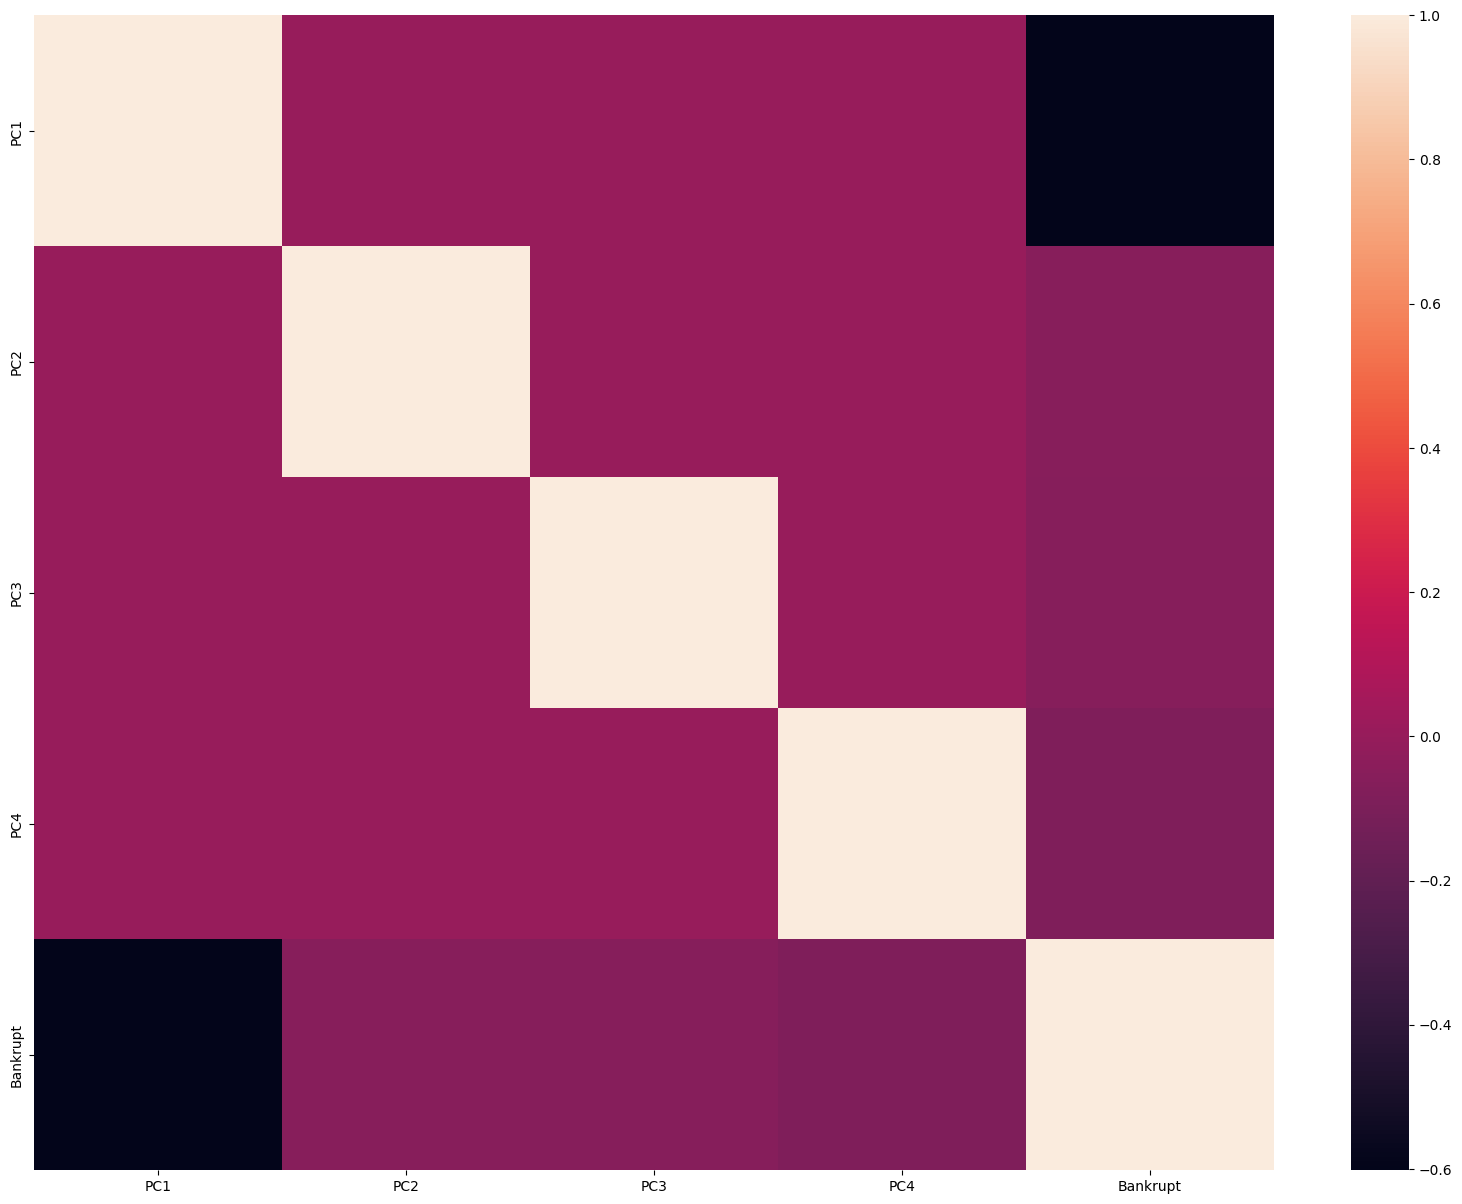

In [30]:
plt.subplots(figsize=(20,15))
sn.heatmap(df.corr())

In [31]:
dataset_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       440 non-null    float64
 1   PC2       440 non-null    float64
 2   PC3       440 non-null    float64
 3   PC4       440 non-null    float64
 4   Bankrupt  440 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 17.3 KB


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [33]:
df_Predictors=dataset_knn.drop(["Bankrupt"],axis=1)
df_target=dataset_knn.Bankrupt
features = df_Predictors

In [34]:
Xtrain,Xtest,ytrain,ytest=train_test_split(df_Predictors,df_target,random_state=10,test_size=0.2)
print("Shape of Xtrain:{} and Shape of ytrain:{} ".format(Xtrain.shape,ytrain.shape))
print("Shape of Xtest:{} and Shape of ytest:{} ".format(Xtest.shape,ytest.shape))

Shape of Xtrain:(352, 4) and Shape of ytrain:(352,) 
Shape of Xtest:(88, 4) and Shape of ytest:(88,) 


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from scipy import stats


import time
import math 
import warnings

warnings.filterwarnings('ignore')

In [36]:
# define classifier
classifiers = {
    "KNN" : KNeighborsClassifier(),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    #"LGBM" : LGBMClassifier(random_state=42)
}

# define grid
KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

RF_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 6, 8, 10, 12]}

LGBM_grid = {'n_estimators': [50, 100, 150],
        'max_depth': [4, 6, 8, 10, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

grid = {
    "KNN" : KNN_grid,
    "LogisticRegression" : LR_grid,
    "RandomForest" : RF_grid,
    "LGBM" : LGBM_grid
}

i=0
clf_best_params = classifiers.copy()
scores = pd.DataFrame({
                    'Classifer':classifiers.keys(),
                    'Train accuracy' : np.zeros(len(classifiers)),
                    'Validation accuracy': np.zeros(len(classifiers)),
                    'Training time': np.zeros(len(classifiers))
                    })

for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    clf.fit(Xtrain, ytrain)
    scores.iloc[i,1]=clf.score(Xtrain, ytrain)
    scores.iloc[i,2]=clf.score(Xtest, ytest)
    clf_best_params[key]=clf.best_params_
    
    stop = time.time()
    scores.iloc[i,3]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', scores.iloc[i,3])
    print('')
    i+=1

    
print(clf_best_params)
print(scores)

Model: KNN
Training time (mins): 0.11

Model: LogisticRegression
Training time (mins): 0.0

Model: RandomForest
Training time (mins): 0.1

{'KNN': {'n_neighbors': 7, 'p': 1}, 'LogisticRegression': {'C': 0.25, 'max_iter': 50, 'penalty': 'l2'}, 'RandomForest': {'max_depth': 6, 'n_estimators': 100}}
            Classifer  Train accuracy  Validation accuracy  Training time
0                 KNN        0.886364             0.784091           0.11
1  LogisticRegression        0.855114             0.818182           0.00
2        RandomForest        0.940341             0.795455           0.10


In [37]:
train_features, test_features, train_labels, test_labels = train_test_split(
    df_Predictors, df_target, train_size=0.8)
svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value
svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.88
Classical SVC on the test dataset:     0.81


In [38]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.primitives import Sampler

In [39]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#feature_map.decompose().draw(output="mpl", style="clifford", fold=20)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

In [40]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

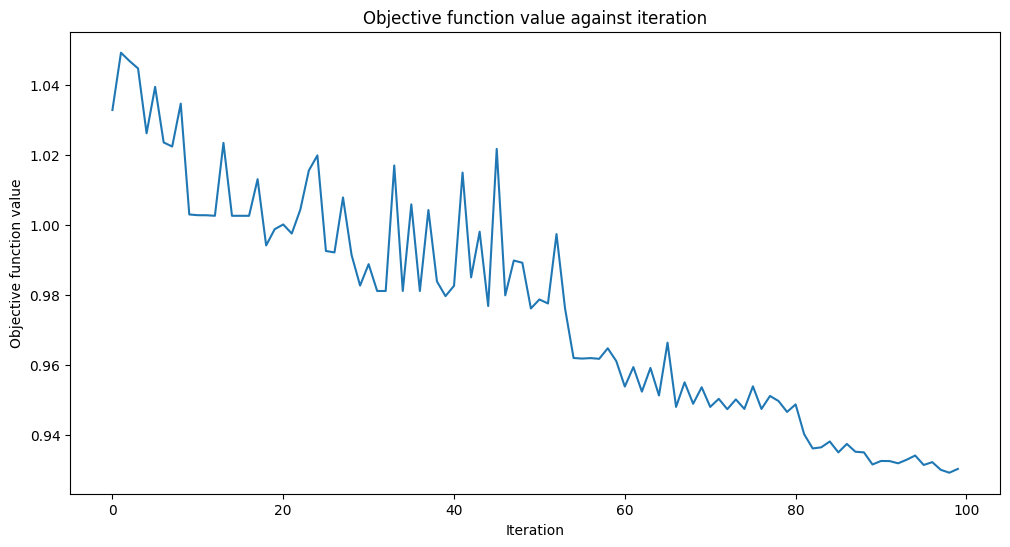

Training time: 122 seconds


In [41]:

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
train_labels = np.array(train_labels)
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [43]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.61
Quantum VQC on the test dataset:     0.39
